In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-05-19 10:16:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 74.125.137.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   161MB/s    in 0.4s    

2022-05-19 10:16:53 (161 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close() 

In [ ]:
import os
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# 데이터셋에 샘플이 얼마나 많은지 확인해보겠습니다.
#train_cat_fnames = os.listdir(train_cats_dir)
#train_dog_fnames = os.listdir(train_dogs_dir)
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
# 샘플의 숫자가 tutorial치고는 조금 많습니다.
# training sample과, validation sample의 숫자를 조절합니다.
NUM_TRAIN_SAMPLE_PER_CLASS = 200
NUM_VALID_SAMPLE_PER_CLASS = 100
our_train_cat_fnames = os.listdir(train_cats_dir)[:NUM_TRAIN_SAMPLE_PER_CLASS]
our_train_dog_fnames = os.listdir(train_dogs_dir)[:NUM_TRAIN_SAMPLE_PER_CLASS]
our_valid_cat_fnames = os.listdir(validation_cats_dir)[:NUM_VALID_SAMPLE_PER_CLASS]
our_valid_dog_fnames = os.listdir(validation_dogs_dir)[:NUM_VALID_SAMPLE_PER_CLASS]

our_train_cat_file_path = list(map(lambda x: os.path.join(train_cats_dir,x), our_train_cat_fnames))
our_train_dog_file_path = list(map(lambda x: os.path.join(train_dogs_dir,x), our_train_dog_fnames))

our_valid_cat_file_path = list(map(lambda x: os.path.join(validation_cats_dir,x), our_valid_cat_fnames))
our_valid_dog_file_path = list(map(lambda x: os.path.join(validation_dogs_dir,x), our_valid_dog_fnames))


print(our_valid_cat_file_path)
print(our_valid_dog_file_path)


['/tmp/cats_and_dogs_filtered/validation/cats/cat.2418.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2472.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2031.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2194.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2456.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2101.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2060.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2474.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2143.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2447.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2185.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2025.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2108.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2212.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2316.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2035.jpg', '/tmp/cats_and_dogs_filtered/validation

In [ ]:
# 고양이와 개 샘플을 하나로 묶어줍니다. 
our_train_file_path = our_train_cat_file_path + our_train_dog_file_path
our_valid_file_path = our_valid_cat_file_path + our_valid_dog_file_path

# 정답 데이터도 생성합니다. 0을 고양이, 1을 개로 설정하겠습니다.
train_ground_truth = [0 for _ in range(len(our_train_cat_file_path))] + [1 for _ in range(len(our_train_dog_file_path))]
valid_ground_truth = [0 for _ in range(len(our_valid_cat_file_path))] + [1 for _ in range(len(our_valid_dog_file_path))]
# zip을 이용하여 학습 샘플과 정답을 묶어줍니다.
train_dataset = list(zip(our_train_file_path, train_ground_truth))
valid_dataset = list(zip(our_valid_file_path, valid_ground_truth))

print('Train sample 개수: {}'.format(len(train_dataset)))
print('Validation sample 개수: {}'.format(len(valid_dataset)))

Train sample 개수: 400
Validation sample 개수: 200


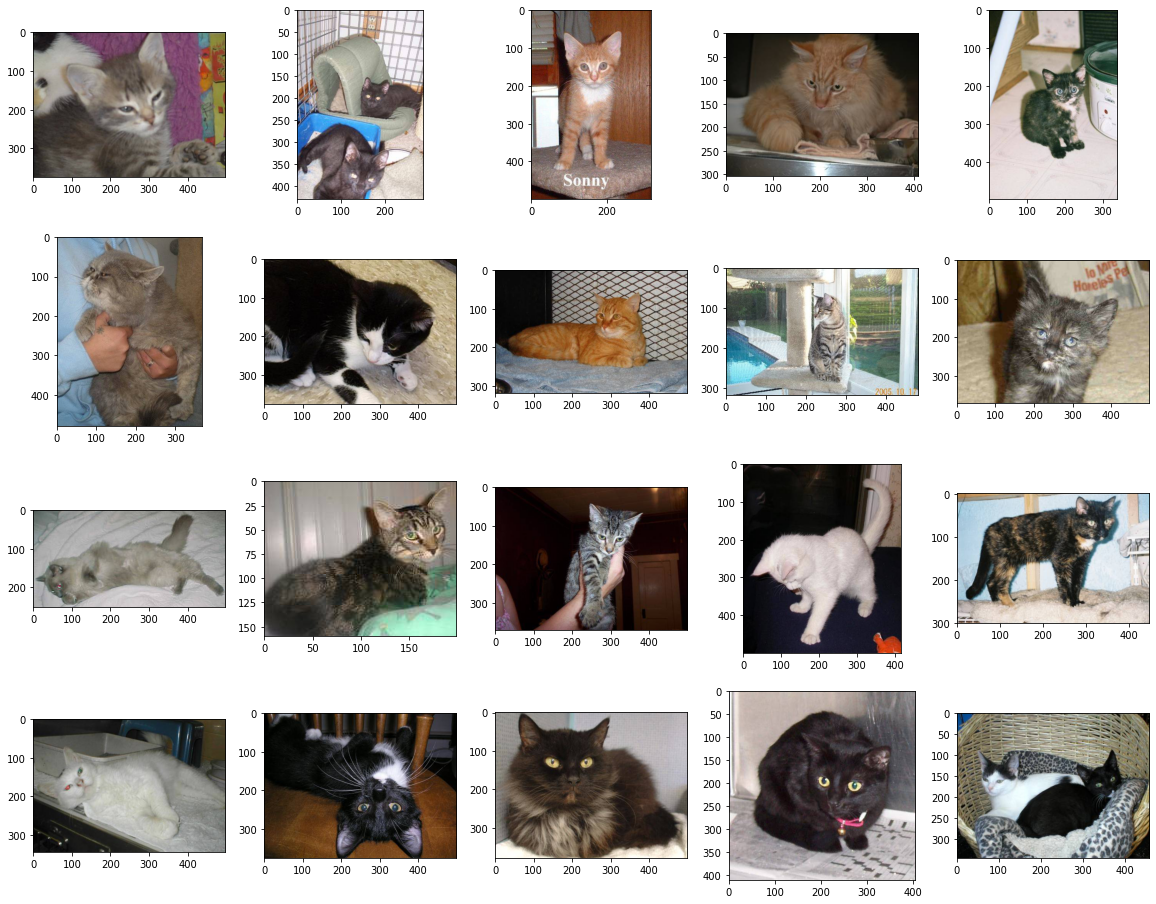

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrow = 4
ncols = 5

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrow*4)

for i, img_path in enumerate(our_valid_file_path):
  sp = plt.subplot(nrow, ncols, i+1)
  sp.axis('On')

  img = mpimg.imread(img_path)
  plt.imshow(img)

  if i == 19:
    break
plt.show()






In [ ]:
import torch

num_pixel = 128 * 128 * 3
num_class = 2

linear_model = torch.nn.Linear(num_pixel, num_class)
print(linear_model)


Linear(in_features=49152, out_features=2, bias=True)


In [ ]:
from PIL import Image
from torchvision import transforms

resize_fn = transforms.Resize((128, 128))
to_tensor = transforms.ToTensor()

test_image = Image.open(our_train_file_path[0])

x = resize_fn(test_image)
print(x.size)

x = to_tensor(x)
print(x.shape)

flattened_x = x.flatten()
print(flattened_x.shape)

pred = linear_model(flattened_x)

print(pred)


(128, 128)
torch.Size([3, 128, 128])
torch.Size([49152])
tensor([ 0.2464, -0.2066], grad_fn=<AddBackward0>)


입력한 사진은cat


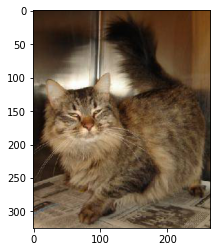

In [ ]:
classifier_dict = {
    0:'cat',
    1:'dog'
}

pred_class = pred.argmax().item()
print(f'입력한 사진은{classifier_dict[pred_class]}')

plt.imshow(test_image)
plt.show()


In [ ]:
from PIL import Image
from torchvision import transforms
import random

num_pixel = 128*128*3
num_class = 2

random.shuffle(train_dataset)

linear_model = torch.nn.Linear(num_pixel, num_class)

optimizer = torch.optim.Adam(linear_model.parameters())

loss_fn = torch.nn.CrossEntropyLoss()

MAX_EPOCH = 150

transform = transforms.Compose([transforms.Resize((128,128)), transforms.ToTensor()])

PRINT_EVERY = 50

for ep in range(MAX_EPOCH):
  running_loss = 0.0
  for i, (fname, y) in enumerate(train_dataset):
    image = Image.open(fname)

    x = transform(image)
    x = x.flatten().view(1, -1)

    pred = linear_model(x)

    gt = torch.zeros((1, 2), dtype=torch.float32)

    gt[0][y] = 1.0

    loss = loss_fn(pred, gt)

    running_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if (i+1) % PRINT_EVERY == 0:
      print(f'{ep+1}/{MAX_EPOCH} - {i+1}/{len(train_dataset)} Loss: {running_loss/PRINT_EVERY}')
      running_loss = 0.0

1/150 - 50/400 Loss: 5.988507836287483
1/150 - 100/400 Loss: 5.4340424483400875
1/150 - 150/400 Loss: 15.675458271726965
1/150 - 200/400 Loss: 17.424765411307778
1/150 - 250/400 Loss: 8.557757543541143
1/150 - 300/400 Loss: 9.717188293058047
1/150 - 350/400 Loss: 15.470309843545174
1/150 - 400/400 Loss: 14.341081124474117
2/150 - 50/400 Loss: 7.003747234853173
2/150 - 100/400 Loss: 4.9956637032177005
2/150 - 150/400 Loss: 7.8985056289402475
2/150 - 200/400 Loss: 14.080805033627588
2/150 - 250/400 Loss: 10.199532541716156
2/150 - 300/400 Loss: 7.395676966670451
2/150 - 350/400 Loss: 12.153991643450247
2/150 - 400/400 Loss: 12.169141906087376
3/150 - 50/400 Loss: 7.874875657576308
3/150 - 100/400 Loss: 6.260557187730548
3/150 - 150/400 Loss: 18.483775641330865
3/150 - 200/400 Loss: 8.880806667788038
3/150 - 250/400 Loss: 5.726564331966738
3/150 - 300/400 Loss: 5.243456020558146
3/150 - 350/400 Loss: 20.71157128208158
3/150 - 400/400 Loss: 12.328736565228962
4/150 - 50/400 Loss: 7.8141035

입력한 시진은 dog입니다.


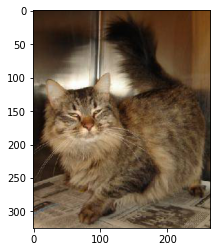

In [ ]:
classifier_dict = {
    0: 'dog',
    1: 'cat'
}

image = Image.open( train_dataset[5][0])

x = transform(image)
x = x.flatten().view(1,-1)

pred = linear_model(x)

pred_class = pred.argmax().item()
print(f'입력한 시진은 {classifier_dict[pred_class]}입니다.')

plt.imshow(test_image)
plt.show()


In [ ]:
from PIL import Image
from torchvision import transforms
transform = transforms.Compose([transforms.Resize((128,128)), transforms.ToTensor()])
accuracy = 0
print(valid_dataset)

for i, (fname, y) in enumerate(valid_dataset):
  image = Image.open(fname)

  x = transform(image)
  x = x.flatten().view(1, -1)

  pred = linear_model(x)

  pred_class = pred.argmax().item()

  if pred_class == y:
    accuracy += 1

print('test accuracy: {}'.format(accuracy/len(valid_dataset)))



[('/tmp/cats_and_dogs_filtered/validation/cats/cat.2418.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2472.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2031.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2194.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2456.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2101.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2060.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2474.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2143.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2447.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2185.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2025.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2108.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2212.jpg', 0), ('/tmp/cats_and_dogs_filtered/validation/cats/cat.2316.jpg', 0), ('/tmp/cats_and_dogs_fil

"\nfor i, (fname, y) in enumerate(valid_dataset):\n  image = Image.open(fname)\n\n  x = transform(image)\n  x = x.flatten().view(1, -1)\n\n  pred = linear_model(x)\n\n  pred_class = pred.argmax().item()\n\n  if pred_class == y:\n    accuracy += 1\n\nprint('test accuracy: {}'.format(accuracy/len(valid_dataset)))\n\n"

In [ ]:
num_pixel = 128*128*3
num_class = 2

import torch
from torchvision import transforms
from PIL import Image

hidden_size = 100
first_layer = torch.nn.Linear(num_pixel, hidden_size)
second_layer = torch.nn.Linear(hidden_size, num_class)
relu = torch.nn.ReLU()

optimizer = torch.optim.Adam(
    list(first_layer.parameters()) + list(second_layer.parameters()), 
    lr = 0.0001
)

loss_fn = torch.nn.CrossEntropyLoss()
MAX_EPOCH = 15
PRINT_EVERY = 50
transform = transforms.Compose([transforms.Resize((128,128)), transforms.ToTensor()])


for ep in range(MAX_EPOCH):
  running_loss = 0.0
  for i, (fname, y) in enumerate(train_dataset):
    image = Image.open(fname)

    x = transform(image)
    x = x.flatten().view(1, -1)

    h = first_layer(x)

    h = relu(h)

    pred = second_layer(h)

    gt = torch.zeros((1, 2), dtype=torch.float32)

    gt[0][y] = 1.0

    loss = loss_fn(pred, gt)

    running_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if (i+1) % PRINT_EVERY == 0:
      print(f'{ep+1}/{MAX_EPOCH} - {i+1}/{len(train_dataset)} Loss: {running_loss/PRINT_EVERY}')
      running_loss = 0



1/15 - 50/400 Loss: 0.8850551372766495
1/15 - 100/400 Loss: 0.7355818340182304
1/15 - 150/400 Loss: 0.8087092077732086
1/15 - 200/400 Loss: 0.7518135851621628
1/15 - 250/400 Loss: 0.7009795022010803
1/15 - 300/400 Loss: 0.7037295842170715
1/15 - 350/400 Loss: 0.7926091125607491
1/15 - 400/400 Loss: 0.7331853526830673
2/15 - 50/400 Loss: 0.6874723929166794
2/15 - 100/400 Loss: 0.6717670542001725
2/15 - 150/400 Loss: 0.7758178758621216
2/15 - 200/400 Loss: 0.6989265751838684
2/15 - 250/400 Loss: 0.654228276014328
2/15 - 300/400 Loss: 0.7195791155099869
2/15 - 350/400 Loss: 0.6890274405479431
2/15 - 400/400 Loss: 0.7123101603984833
3/15 - 50/400 Loss: 0.6867417460680008
3/15 - 100/400 Loss: 0.6897125554084778
3/15 - 150/400 Loss: 0.7013945412635804
3/15 - 200/400 Loss: 0.6796464645862579
3/15 - 250/400 Loss: 0.6386537009477615
3/15 - 300/400 Loss: 0.7098254543542862
3/15 - 350/400 Loss: 0.6977939569950103
3/15 - 400/400 Loss: 0.6920747709274292
4/15 - 50/400 Loss: 0.6924685609340667
4/15 

In [ ]:

num_pixel = 128*128*3
num_class = 3

import torch

hidden_size = 100

first_layer = torch.nn.Linear(num_pixel, hidden_size)
second_layer = torch.nn.Linear(hidden_size, num_class)
relu = torch.nn.ReLU()

h = relu(first_layer(x))

logit = second_layer(h)


